<a href="https://colab.research.google.com/github/Moisito12/Tensorflow-2.0/blob/master/Redes_Neuronales_de_Convoluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paso 1: Instalar las dependencias y configuración del entorno

In [2]:
!pip install tensorflow-gpu==2.0.0-alpha0

     |████████████████████████████████| 332.1MB 47kB/s 
     |████████████████████████████████| 419kB 56.5MB/s 
     |████████████████████████████████| 3.0MB 50.9MB/s 


# Paso 2: Importar las librerias necesarias

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
%matplotlib inline
tf.__version__

'2.0.0-alpha0'

# Paso 3: Pre procesado de datos

**Cargar el dataset Cifar10**

In [0]:
# Configurar el nombre de las variables del dataset
class_names = ['avion','coche','pájaro','gato','ciervo','perro','rana','caballo','barco','camión']

In [5]:
# Cargar el dataset
(X_train, y_train), (X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
X_train = X_train / 255.0

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test = X_test/255.0

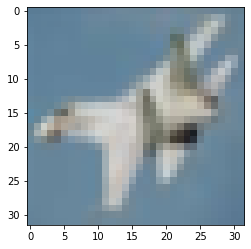

In [12]:
plt.imshow(X_test[10])

In [13]:
y_test[10]

array([0])

# Paso 4: Construir una red neuronal convolucional

**Definir el modelo**

In [0]:
model = tf.keras.models.Sequential()

# Añadir la primera capa de convolución
Hyper parámetros de la capa de la RNC:

Filtros: 32

Tamaño del kernel: 3

padding: same

Función de Activación: relu

input_shape: (32, 32, 3)

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu",input_shape=[32,32,3]))

# Añadir una segunda capa convolucional y la capa de max-pooling
Hyper parámetros de la capa de la RNC:

Filtros: 32

Tamaño del kernel: 3

padding: same

Función de Activación: relu

Hyper parámetros de la capa de MaxPool:

pool_size: 2

strides: 2

padding: valid

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))

# Añadir la tercera capa convolucional
Hyper parámetros de la capa de la RNC:

Filtros: 64

Tamaño del kernel: 3

padding: same

Función de Activación: relu

In [0]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

# Añadir la cuarta capa convolucional y la capa de max-pooling
Hyper parámetros de la capa de la RNC:

Filtros: 64

Tamaño del kernel: 3

padding: same

Función de Activación: relu

Hyper parámetros de la capa de la MaxPool:

pool_size: 2

strides: 2

padding: valid

In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

# Añadir la capa de flattening

In [0]:
model.add(tf.keras.layers.Flatten())

# Añadir la primera capa fully-connected
Hyper parámetros de la capa totalmente conectada:

units/neurons: 128

activation: relu

In [0]:
model.add(tf.keras.layers.Dense(units=128,activation="relu"))

# Añadir la capa de salida
Hyper parámetros de la capa totalmente conectada:

units/neurons: 10 (number of classes)

activation: softmax

In [0]:
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)             

# Compilar el modelo
sparse_categorical_accuracy

sparse_categorical_accuracy comprueba si el valor verdadero maximal coincide 
con el índice maximal del valor de la predicción.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy

In [0]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["sparse_categorical_accuracy"])

# Entrenar el modelo

In [29]:
model.fit(X_train, y_train,epochs=10)

Epoch 1/10
50000/50000 [==============================] - 260s 5ms/sample - loss: 1.3740 - sparse_categorical_accuracy: 0.5058
Epoch 2/10
50000/50000 [==============================] - 269s 5ms/sample - loss: 0.9093 - sparse_categorical_accuracy: 0.6803
Epoch 3/10
50000/50000 [==============================] - 264s 5ms/sample - loss: 0.7254 - sparse_categorical_accuracy: 0.7471
Epoch 4/10
50000/50000 [==============================] - 258s 5ms/sample - loss: 0.5992 - sparse_categorical_accuracy: 0.7897
Epoch 5/10
50000/50000 [==============================] - 259s 5ms/sample - loss: 0.4958 - sparse_categorical_accuracy: 0.8242
Epoch 6/10
50000/50000 [==============================] - 260s 5ms/sample - loss: 0.3943 - sparse_categorical_accuracy: 0.8608
Epoch 7/10
50000/50000 [==============================] - 259s 5ms/sample - loss: 0.3118 - sparse_categorical_accuracy: 0.8885
Epoch 8/10
50000/50000 [==============================] - 273s 5ms/sample - loss: 0.2397 - sparse_categorical_a

# Evaluar el modelo


In [30]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)

10000/10000 [==============================] - 12s 1ms/sample - loss: 1.3381 - sparse_categorical_accuracy: 0.7268


In [31]:
print("Test Accuracy: {}".format(test_accuracy))

Test Accuracy: 0.7268000245094299
